#Második beadandó feladat.
Tölts ki minden cellát a cella fölött megjelölt feladat megoldásával. Lehet szabadon cellát hozzáadni, amennyiben szükséges.

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import os

In [3]:
import kagglehub


path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/baltighk/.cache/kagglehub/datasets/shashanknecrothapa/ames-housing-dataset/versions/1


In [4]:

csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

if csv_files:
    first_csv = os.path.join(path, csv_files[0])
    try:
        df = pd.read_csv(first_csv)
    except FileNotFoundError:
      print(f"Nem található fájl: {first_csv}")
else:
    print("Hiba")


A következő cellában irasd ki az adathalmaz dimenzióját (sorok száma, oszlopok száma)

In [5]:
print("Dimenzió:", df.shape)

Dimenzió: (2930, 82)


A következő cellában irasd ki az adathalmaz első öt sorát

In [6]:
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

A következő cellában ird ki az összes oszlop nevét, a nem null elemek számát és az oszlopban található adatok típusát

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Hozz létre egy táblázatot a szám típusú oszlopokból amely olyan sorokat tartalmaz, mint (count, mean, std, min, max Q1, Q2, Q3, stb...)

In [8]:
uj_tablazat= df.select_dtypes(include=[np.number]).columns
desc = df[uj_tablazat].describe(percentiles=[.25, .5, .75]).T
desc.rename(columns={"25%": "Q1", "50%": "Q2", "75%": "Q3"}, inplace=True)
print(desc[['count', 'mean', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max']])

                  count          mean           std          min  \
Order            2930.0  1.465500e+03  8.459625e+02          1.0   
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0   
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0   
Lot Frontage     2440.0  6.922459e+01  2.336533e+01         21.0   
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0   
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0   
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0   
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0   
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0   
Mas Vnr Area     2907.0  1.018968e+02  1.791126e+02          0.0   
BsmtFin SF 1     2929.0  4.426296e+02  4.555908e+02          0.0   
BsmtFin SF 2     2929.0  4.972243e+01  1.691685e+02          0.0   
Bsmt Unf SF      2929.0  5.592625e+02  4.394942e+02          0.0   
Total Bsmt SF    2929.0  1.051615e+03  4.406151e

Az isnul() függvény használatával írd ki oszloponként az oszlopban található null elemek számát

In [9]:
print(df.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


Írd ki az adathalmazban található összes null elem számát

In [10]:
print("Összes hiányzó érték:", df.isnull().sum().sum())

Összes hiányzó érték: 15749


#A hiányzó elemek kezelése

A cols_with_missing változóba gyűjtsd ki az oszlopok nevét, amelyekben található hiányzó elem (Null érték)

In [11]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
print(cols_with_missing)


['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


A következő linken megtalálható az összes információ az adathalmaz oszlopaival kapcsolatban https://jse.amstat.org/v19n3/decock/DataDocumentation.txt . Ennek alapján egyéni elbírálás szerint kezeld a hiányzó értékeket.

In [12]:
df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)
df['Alley'].fillna('NoAlley', inplace=True)
df['Mas Vnr Type'].fillna(df['Mas Vnr Type'].mode()[0], inplace=True)
df['Mas Vnr Area'].fillna(0, inplace=True)
df['Bsmt Qual'].fillna('NoBsmt', inplace=True)
df['Bsmt Cond'].fillna('NoBsmt', inplace=True)
df['Bsmt Exposure'].fillna('NoBsmt', inplace=True)
df['BsmtFin Type 1'].fillna('NoBsmt', inplace=True)
df['BsmtFin SF 1'].fillna(0, inplace=True)

df['BsmtFin Type 2'].fillna('NoBsmt', inplace=True)
df['BsmtFin SF 2'].fillna(0, inplace=True)
df['Bsmt Unf SF'].fillna(0, inplace=True)
df['Total Bsmt SF'].fillna(0, inplace=True)

df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['Bsmt Full Bath'].fillna(0, inplace=True)
df['Bsmt Half Bath'].fillna(0, inplace=True)
df['Fireplace Qu'].fillna('NoFireplace', inplace=True)

df['Garage Type'].fillna('NoGarage', inplace=True)
df['Garage Yr Blt'].fillna(0, inplace=True)
df['Garage Finish'].fillna('NoGarage', inplace=True)
df['Garage Cars'].fillna(0, inplace=True)
df['Garage Area'].fillna(0, inplace=True)
df['Garage Qual'].fillna('NoGarage', inplace=True)
df['Garage Cond'].fillna('NoGarage', inplace=True)
df['Pool QC'].fillna('NoPool', inplace=True)
df['Fence'].fillna('NoFence', inplace=True)
df['Misc Feature'].fillna('None', inplace=True)


/var/folders/bp/v08wvgtd105f0gtwxxw3g8700000gn/T/ipykernel_57044/2125631437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)
/var/folders/bp/v08wvgtd105f0gtwxxw3g8700000gn/T/ipykernel_57044/2125631437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

Ellenőrízd le, hogy valóban nincs több hiányzó elem az adathalmazban

In [22]:
print(df.isnull().sum().sum() == 0)

True


Azokat az oszlopokat amelyek jelenleg "object" típusúak, alakítsd át "category" típusúvá

In [14]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

A számértékeket tartalmazó sorokat normalizáld nulla és egy közé annak érdekében, hogy azonos skálán helyezkedjenek el.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
szam_sorok = df.select_dtypes(include=[np.number]).columns
df[szam_sorok] = scaler.fit_transform(df[szam_sorok])


A "category" típusú sorokat valamilyen kódolási módszerrel alakítsd át úgy, hogy számértékeket tartalmazzanak. (Például label encoding, one hot encoding, ...)

In [16]:
for col in df.select_dtypes(include='category').columns:
    df[col] = df[col].cat.codes

#Adat vizualizáció és oszlop kiválasztás

Készíts egy korrelációs mátrixot a normalizált és kódolt adathalmazhoz

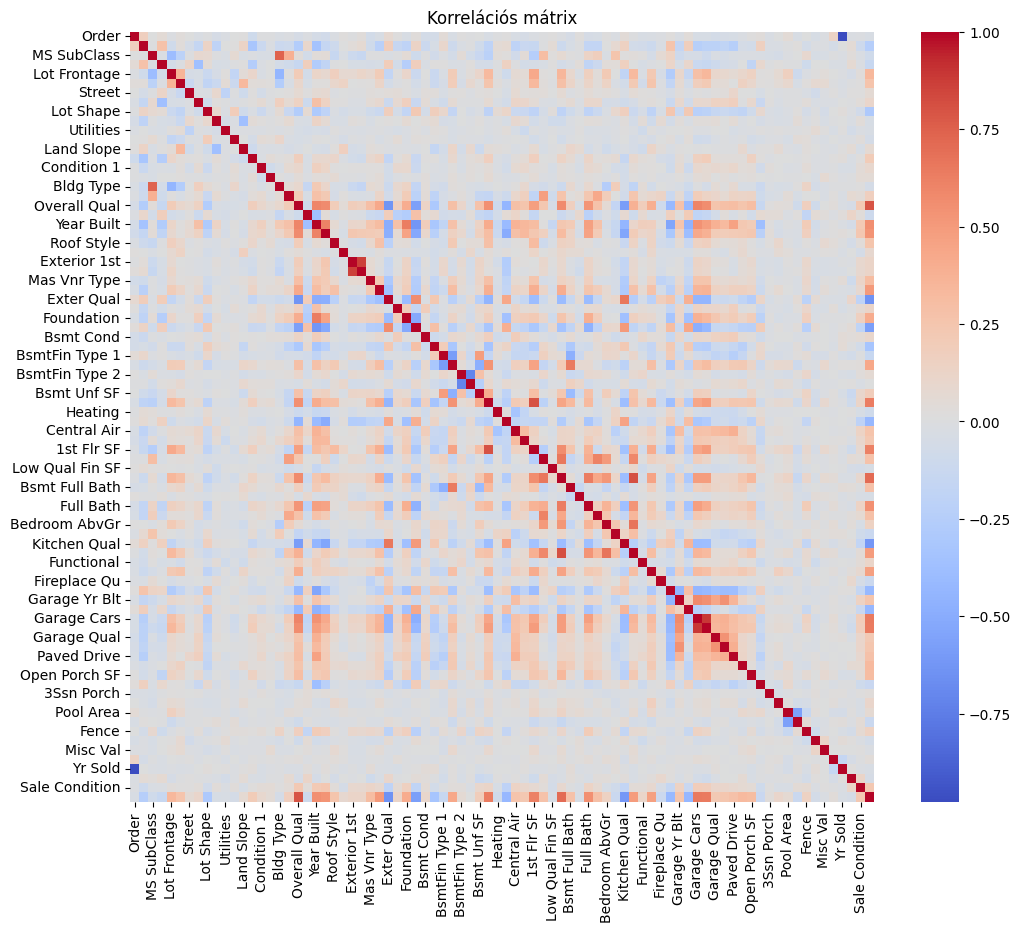

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(matrix, cmap="coolwarm")
plt.title("Korrelációs mátrix")
plt.show()


Válassz egy küszöbértéket, ami meghatározza, hogy mekkora korreláció után lesz figyelembe véve egy oszlop, majd ezt felhasználva válogasd ki a megfelelő oszlopokat.

In [18]:
hidegviz = matrix['SalePrice'].abs()
valasztott = hidegviz[hidegviz > 0.3].index.tolist()
print("Választott oszlopok:", valasztott)

Választott oszlopok: ['Lot Frontage', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice']


Válaszd két részre a feldolgozott adathalmazodat. X - ide megy minden ami nem a jósolni kívánt érték -, valamint y - SalePrice oszlop - .  

In [ ]:
x = df[valasztott].drop('SalePrice', axis=1)
y = df['SalePrice']

A train_test_split segítségével válaszd 3 részre az adathalmazodat. Tanító tesztelő és validáló adathalmazra.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#Training the neural network

Hozz létre egy neurális hálót, ami az általad kiválasztott számú tulajdonságot vár bemenetként, és a ház eladási árát adja kimenetként. Kísérletezz különböző számú réteggel valamint aktivációs fügvénnyel és válaszd ki a legoptimálisabbat. (Amennyiben a modell nem tanul elég gyorsan, akkor a Runtime->Change Runtime Type menüponban válts át GPU partícióra)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


ModuleNotFoundError: No module named 'tensorflow'

Compile-old a modelt. Válasz egy megfelelő tanulási rátát valamint error fajtát.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

Tanítsd rá a modelt az adathalmazra. A hibát és a validálási hibát mentsd el, annak érdekében, hogy ezt vizualizálva láthasd, hogy milyen módon javult a modelled teljesítménye. Alkalmazhatsz early-stopping mechanizmust.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7830 - mae: 0.6319 - val_loss: 0.0211 - val_mae: 0.1115
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171 - mae: 0.0996 - val_loss: 0.0116 - val_mae: 0.0823
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - mae: 0.0784 - val_loss: 0.0083 - val_mae: 0.0704
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074 - mae: 0.0637 - val_loss: 0.0057 - val_mae: 0.0580
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - mae: 0.0580 - val_loss: 0.0047 - val_mae: 0.0530
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - mae: 0.0530 - val_loss: 0.0039 - val_mae: 0.0478
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - mae: 0.0492 - val_loss: 0.0039 - val_mae: 0.0488
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - mae: 0.0440 - val_loss: 0.0037 - val_mae: 0.0446
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.003

Vizualizáld a tanítási és validációs hibát ugyanazon a grafikonon

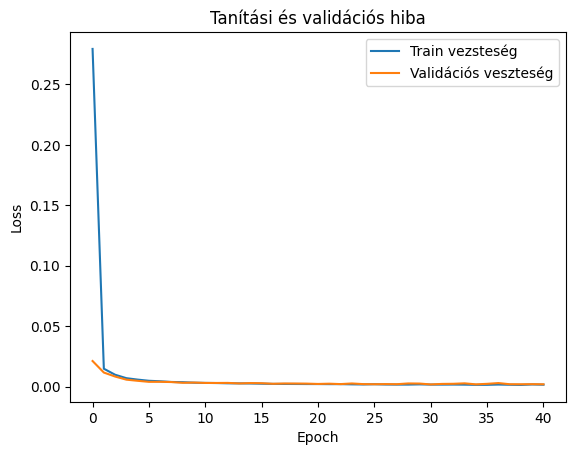

In [ ]:
plt.plot(history.history['loss'], label='Train vezsteség')
plt.plot(history.history['val_loss'], label='Validációs veszteség')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Tanítási és validációs hiba')
plt.show()


Válassz egy véletlenszerű elemet az adathalmazból, vagy találj ki egy sajátot, majd demonstráld, hogy a modell mit jósol rá és ez mennyire tér el az eredeti értéktől.

In [ ]:
i = np.random.randint(0, X_test.shape[0])
teszt = X_test.iloc[[i]]
valos = y_test.iloc[i]
predicted = model.predict(teszt)[0][0]
print(f"Eredeti érték: {valos}, Predikció: {predicted}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Eredeti érték: 0.18284692627837637, Predikció: 0.1562892496585846
